In [4]:
import os
import pandas as pd


In [4]:
# List the main directories and files
print("Main files and directories:")
for item in os.listdir('.'):
    print(f"- {item}")

# Load the train.csv file to understand the metadata
train_df = pd.read_csv('/data/birdclef/birdclef-2025/train.csv')
print("\nTrain CSV structure:")
print(train_df.head())
print("\nColumns:", train_df.columns.tolist())

Main files and directories:
- .venv
- tests
- pyproject.toml
- README.md
- poetry.lock
- birdclef-2025.zip
- birdclef2025

Train CSV structure:
  primary_label secondary_labels  type              filename collection  \
0       1139490             ['']  ['']  1139490/CSA36385.ogg        CSA   
1       1139490             ['']  ['']  1139490/CSA36389.ogg        CSA   
2       1192948             ['']  ['']  1192948/CSA36358.ogg        CSA   
3       1192948             ['']  ['']  1192948/CSA36366.ogg        CSA   
4       1192948             ['']  ['']  1192948/CSA36373.ogg        CSA   

   rating                                                url  latitude  \
0     0.0  http://colecciones.humboldt.org.co/rec/sonidos...    7.3206   
1     0.0  http://colecciones.humboldt.org.co/rec/sonidos...    7.3206   
2     0.0  http://colecciones.humboldt.org.co/rec/sonidos...    7.3791   
3     0.0  http://colecciones.humboldt.org.co/rec/sonidos...    7.2800   
4     0.0  http://colecciones.humbo

Sample files in /data/birdclef/birdclef-2025/train_soundscapes:
- H63_20230429_222500.ogg
- H78_20230427_214000.ogg
- O202_20230514_201500.ogg
- H90_20230506_054500.ogg
- H18_20230502_183000.ogg

Analyzing sample soundscape: /data/birdclef/birdclef-2025/train_soundscapes/H63_20230429_222500.ogg
Sample rate: 32000 Hz
Audio duration: 60.00 seconds


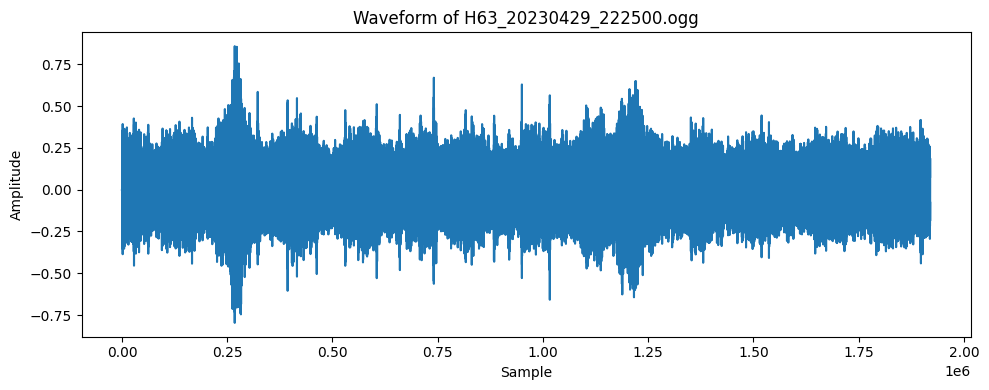


Contents of /data/birdclef/birdclef-2025/train_audio:
- tropar
- 135045
- 66578
- 81930
- 65547
- 1139490
- strowl1
- grnkin
- secfly1
- whttro1

Contents of /data/birdclef/birdclef-2025/train_audio/tropar:
- XC632384.ogg
- XC913755.ogg
- XC774293.ogg
- iNat577231.ogg
- iNat863499.ogg


In [11]:
import os
import librosa
import matplotlib.pyplot as plt

# Define the base directory where your data is stored
# Update this to match your actual directory structure
base_dir = "/data/birdclef/birdclef-2025"

# Check what's in the train_soundscapes directory
train_soundscapes_dir = os.path.join(base_dir, "train_soundscapes")
print(f"Sample files in {train_soundscapes_dir}:")
soundscape_files = os.listdir(train_soundscapes_dir)[:5]  # Show first 5 files
for file in soundscape_files:
    print(f"- {file}")

# Let's analyze one soundscape file
if soundscape_files:
    sample_file = os.path.join(train_soundscapes_dir, soundscape_files[0])
    print(f"\nAnalyzing sample soundscape: {sample_file}")
    
    try:
        # Load the audio file
        audio, sr = librosa.load(sample_file, sr=None)
        print(f"Sample rate: {sr} Hz")
        print(f"Audio duration: {len(audio)/sr:.2f} seconds")
        
        # Plot the waveform
        plt.figure(figsize=(10, 4))
        plt.plot(audio)
        plt.title(f"Waveform of {os.path.basename(sample_file)}")
        plt.xlabel("Sample")
        plt.ylabel("Amplitude")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error loading file: {e}")

# Now let's look at the train_audio directory structure
train_audio_dir = os.path.join(base_dir, "train_audio")
print(f"\nContents of {train_audio_dir}:")
train_audio_contents = os.listdir(train_audio_dir)[:10]  # First 10 items
for item in train_audio_contents:
    print(f"- {item}")

# Let's see what's inside one of these subdirectories
if train_audio_contents:
    subdir = os.path.join(train_audio_dir, train_audio_contents[0])
    if os.path.isdir(subdir):
        print(f"\nContents of {subdir}:")
        files = os.listdir(subdir)[:5]  # First 5 files
        for file in files:
            print(f"- {file}")
    else:
        # If it's a file, let's analyze it
        print(f"\nAnalyzing file: {subdir}")
        try:
            audio, sr = librosa.load(subdir, sr=None)
            print(f"Sample rate: {sr} Hz")
            print(f"Audio duration: {len(audio)/sr:.2f} seconds")
        except Exception as e:
            print(f"Error loading file: {e}")


In [2]:
import pandas as pd

# Load the train.csv file
train_df = pd.read_csv('/data/birdclef/birdclef-2025/train.csv')

# Look at the primary_label column to see if it matches our folder names
print("Sample primary_labels:")
print(train_df['primary_label'].value_counts().head(10))

# Let's also check the relationship between primary_label and filename
print("\nSample rows showing primary_label and filename:")
print(train_df[['primary_label', 'filename', 'scientific_name', 'common_name']].head(10))


Sample primary_labels:
primary_label
grekis     990
compau     808
trokin     787
roahaw     709
banana     610
whtdov     572
socfly1    543
yeofly1    525
bobfly1    514
wbwwre1    499
Name: count, dtype: int64

Sample rows showing primary_label and filename:
  primary_label              filename          scientific_name  \
0       1139490  1139490/CSA36385.ogg     Ragoniella pulchella   
1       1139490  1139490/CSA36389.ogg     Ragoniella pulchella   
2       1192948  1192948/CSA36358.ogg    Oxyprora surinamensis   
3       1192948  1192948/CSA36366.ogg    Oxyprora surinamensis   
4       1192948  1192948/CSA36373.ogg    Oxyprora surinamensis   
5       1192948  1192948/CSA36388.ogg    Oxyprora surinamensis   
6       1194042  1194042/CSA18783.ogg      Copiphora colombiae   
7       1194042  1194042/CSA18794.ogg      Copiphora colombiae   
8       1194042  1194042/CSA18802.ogg      Copiphora colombiae   
9        126247   126247/XC941297.ogg  Leptodactylus insularum   

           

In [7]:
# Check if we have a taxonomy file that maps these codes to species names
taxonomy_path = '/data/birdclef/birdclef-2025/taxonomy.csv'
taxonomy_df = pd.read_csv(taxonomy_path)
print("\nTaxonomy file structure:")
print(taxonomy_df.head())


Taxonomy file structure:
  primary_label  inat_taxon_id               scientific_name  \
0       1139490        1139490          Ragoniella pulchella   
1       1192948        1192948         Oxyprora surinamensis   
2       1194042        1194042           Copiphora colombiae   
3        126247         126247       Leptodactylus insularum   
4       1346504        1346504  Neoconocephalus brachypterus   

                    common_name class_name  
0          Ragoniella pulchella    Insecta  
1         Oxyprora surinamensis    Insecta  
2           Copiphora colombiae    Insecta  
3        Spotted Foam-nest Frog   Amphibia  
4  Neoconocephalus brachypterus    Insecta  
